# 4. Feature Engineering

In [ ]:
# Create a new feature: percentage discount
df['discount_percentage'] = ((df['originalPrice'] -
df['price']) / df['originalPrice']) * 100

In [ ]:
df['discount_percentage']

,discount_percentage
2,49.668367
4,56.226956
5,90.463973
7,50.169926
20,50.669427
...,...
1938,40.637907
1948,24.440824
1955,80.157754
1964,82.530949


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Convert productTitle into a numeric feature using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100)
productTitle_tfidf = tfidf.fit_transform(df['productTitle'])

In [ ]:
# Convert to DataFrame and concatenate to original df
productTitle_tfidf_df = pd.DataFrame(productTitle_tfidf.toarray(),
columns = tfidf.get_feature_names_out())
df = pd.concat([df, productTitle_tfidf_df], axis=1)

In [ ]:
# df.head()

In [ ]:
# Drop original productTitle as it's now encoded
# df = df.drop('productTitle', axis=1)

# 5. Data Visualization

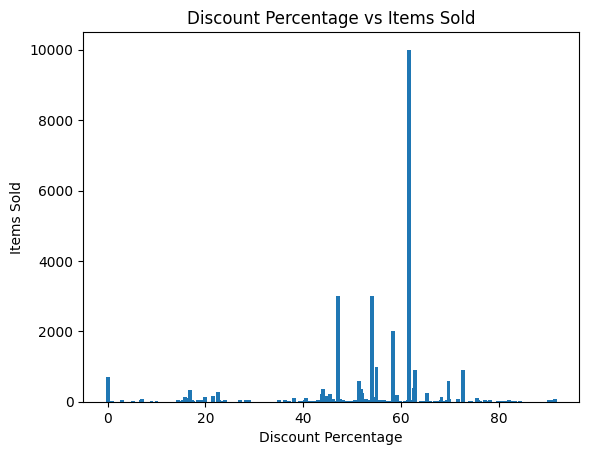

In [ ]:
plt.bar(df['discount_percentage'],df['sold'])
plt.title('Discount Percentage vs Items Sold')
plt.xlabel('Discount Percentage')
plt.ylabel('Items Sold')
plt.show()

In [ ]:
df['productTitle'].nunique()

450

In [ ]:
df['productTitle'].value_counts()

,count
productTitle,
"White Vanity Desk with Mirror, Lights and Charging Station - Large Makeup Table Set with RGB Cabinets and 3 LED Light Modes",3
"Patio Furniture Outdoor Set, Terrace Sofa Set, All-weather PE Rattan with Padded Cushions, Garden Furniture Sets",3
"Living Room Furniture, Modern 3-Piece Including Three-Seater, Loveseat and Single Chair,Dutch Velvet Upholstered Sofa Set",2
"Cushions for Patio Furniture Replacement, Patio Furniture Cushions, Deep Seat Cushions, Outdoor Seat Cushions",2
LEEGOHOME Wardrobe 170x45x170cm 26mm Painted Alloy Steel Pipe ABS Interface Wholesale Purchasing Cloth Wardrobe 5-7Days Delivery,2
...,...
"Shintenchi 5 Pieces Outdoor Patio Sectional Sofa Couch, Silver Gray PE Wicker Furniture Conversation Sets with Washable Cushions",1
Makeup Table With 5 Drawers & Shelves Vanity Table Set Large Vanity Desk With Mirror and Lights White and Gold Bedroom Furniture,1
"Living Room Sofa Set , L Shape Modular Storage Ottoman & Chaise, Comfy Corner Sofa Cup Holder Living Room Furniture Couch Sets",1


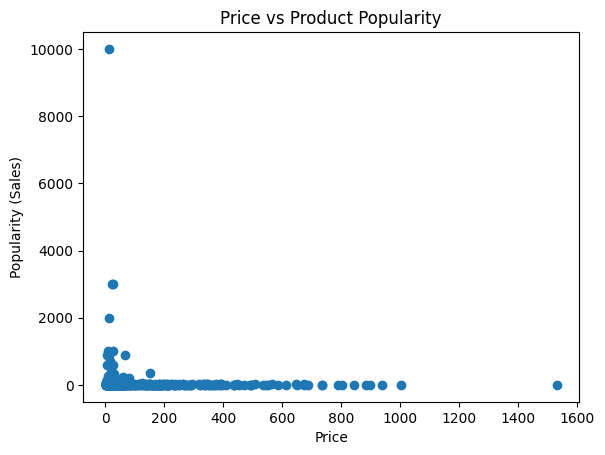

In [ ]:
plt.scatter(df['price'], df['sold'])
plt.xlabel("Price")
plt.ylabel("Popularity (Sales)")
plt.title("Price vs Product Popularity")
plt.show()

In [ ]:
df.head()

,productTitle,originalPrice,price,sold,tagText,discount_percentage
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7.0,0.0,49.668367
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1.0,0.0,56.226956
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53.0,0.0,90.463973
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5.0,0.0,50.169926
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39.0,0.0,50.669427


In [ ]:
df.drop(df.columns[4],axis=1,inplace=True)

In [ ]:
df.head()

,productTitle,originalPrice,price,sold,discount_percentage
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7.0,49.668367
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1.0,56.226956
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53.0,90.463973
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5.0,50.169926
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39.0,50.669427
